In [1]:
using QuantumCollocation
using NamedTrajectories
using Plots; gr()
# using CairoMakie
using LinearAlgebra
using SignalAnalysis
using Unitful
using HDF5

In [2]:
data_path = "data/T_100_dt_1.0_dda_0.0001_a_0.12566370614359174_max_iter_100_00000.jld2"
data = load_problem(data_path; return_data=true)
traj = data["trajectory"]

Loading data dict from data/limited_drives_T_100_dt_1.0_dda_0.0001_a_0.12566370614359174_max_iter_100_00000.jld2:

   duration = 72.61324981519805
   final_fidelity = 0.9922185163356951


NamedTrajectory{Float64}([1.0 1.0 … 0.007575094597536527 0.0066429378333538545; 0.0 0.0 … 0.0 0.0; … ; 1.8981443306253186e-6 3.7667442303727987e-6 … 1.107924470744334e-10 -5.112400723147125e-21; 0.7334671698504867 0.7334671698504867 … 0.7334671698504867 0.7334671698504867], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.05541568848816433, 0.0, 0.0, -0.0034719494553613253, -0.000302106228627415, 6.171191907215001e-21, -5.112400723147125e-21, 0.7334671698504867], 100, :Δt, 519, (Ũ⃗ = 512, a = 2, da = 2, dda = 2, Δt = 1, states = 516, controls = 3), (a = ([-0.12566370614359174, -0.12566370614359174], [0.12566370614359174, 0.12566370614359174]), dda = ([-0.0001, -0.0001], [0.0001, 0.0001]), Δt = ([0.5], [1.2])), (Ũ⃗ = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], a = [0.0, 0.0]), (a = [0.0, 0.0],), (Ũ⃗ = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],), (Ũ⃗

In [4]:
pulse = traj.a
ts = times(traj)

100-element Vector{Float64}:
  0.0
  0.7334671698504867
  1.4669343397009733
  2.20040150955146
  2.9338686794019466
  3.6673358492524333
  4.40080301910292
  5.134270188953407
  5.867737358803893
  6.60120452865438
  ⋮
 66.74551245639417
 67.47897962624465
 68.21244679609514
 68.94591396594562
 69.6793811357961
 70.41284830564659
 71.14631547549708
 71.87978264534756
 72.61324981519805

In [5]:
# save pulse and times
pulse_path = "data/pulse.hdf5"
pulse_file = h5open(pulse_path, "w")
pulse_file["pulse"] = pulse
pulse_file["ts"] = ts
close(pulse_file)


In [9]:
# load pulse and times
pulse_path = "data/pulse.hdf5"
pulse_file = h5open(pulse_path, "r")
pulse_file["pulse"][:,:]

2×100 Matrix{Float64}:
 0.0   0.00254727    0.00505691   …  0.00505566   0.00254656   0.0
 0.0  -0.000218839  -0.000436656     0.000442186  0.000221585  0.0

In [ ]:

Δt = traj[end].Δt[1] # ns
fs = (1 / Δt)u"GHz" # GHz

In [35]:
pulse = signal(collect(pulse'), fs)

SampledSignal @ 1.3633875e9 Hz, 100×2 Matrix{Float64}:
 0.0          0.0
 0.00254727  -0.000218839
 0.00505691  -0.000436656
 0.0075217   -0.000652447
 0.00993888  -0.000865229
 0.012307    -0.00107405
 0.0146252   -0.00127798
 0.0168927   -0.00147614
 0.0191093   -0.00166768
 0.0212746   -0.00185182
 ⋮           
 0.0191064    0.00169216
 0.01689      0.0014971
 0.0146226    0.00129558
 0.0123047    0.00108845
 0.00993687   0.000876561
 0.00752003   0.00066083
 0.00505566   0.000442186
 0.00254656   0.000221585
 0.0          0.0

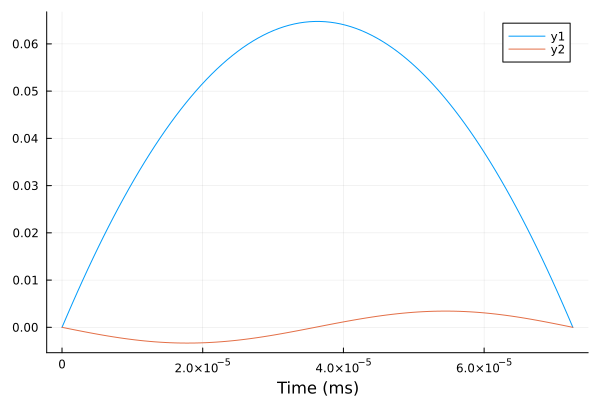

In [27]:
Plots.plot(pulse)
# save the plot
savefig("plots/limited_drives_T_100_dt_1.0_dda_0.0001_a_0.12566370614359174_max_iter_100_00000.png")

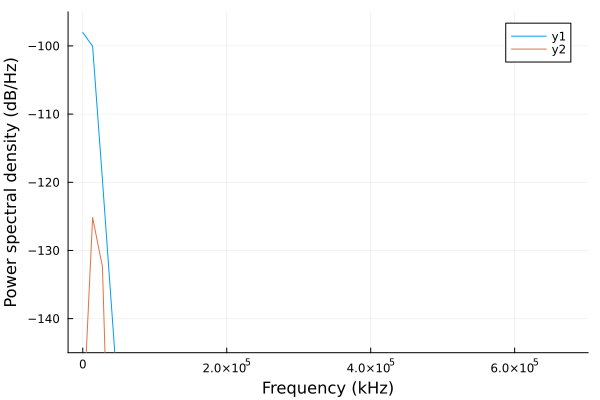

In [38]:
psd(pulse; nfft=size(pulse, 1))
# savefig("plots/limited_drives_freqs.png")

In [37]:
y1 = tfd(pulse[:,1], Spectrogram())

SignalAnalysis.TFD{Float64}(Matrix{Float64}(undef, 129, 0), Float32[0.0, 5.3257325f6, 1.0651465f7, 1.5977198f7, 2.130293f7, 2.6628662f7, 3.1954396f7, 3.728013f7, 4.260586f7, 4.793159f7  …  6.337622f8, 6.390879f8, 6.4441363f8, 6.497394f8, 6.550651f8, 6.6039085f8, 6.6571654f8, 6.710423f8, 6.76368f8, 6.8169376f8], 9.388379908303694e-8:1.8776759816607387e-7:-9.388379908303694e-8)